Riccardo Lorenzon - Head of Data @Vedrai 

riccardo.lorenzon@vedrai.com

# Introduction to Machine Learning Models

## What is a Machine Learning model?

$y = f(x)$ is the most general form of mathematical relationship between an input $x$ and an output $y$. We call our approximation of $f$ an Estimator

We want to estimate $f$ in "the most accurate way" starting from available data thanks to a model which "learns" the underlying mathematical relationship (fit).

Knowledge of $f$ is mainly used for prediction of $y$ for a specific $x$ which we have not seen in the orginal dataset (predict).

## Regression or classification?

We talk about **regression** when $y$ is a real value or vector. 

We talk about **classification** when $y$ is a categorical value or vector.

## What is Linear Regression?

Linear regression is one of the simplest and most commonly used machine learning algorithms. It tries to find a straight line that best fits your data, which can then be used to make predictions. 

$y = a + b*x$

## Step 1: Import the necessary libraries

First, we need to import the Python libraries that will help us work with data and build our model.

!pip install scikit-learn

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

## Step 2: Create or load a dataset

For this tutorial, we'll create a simple dataset about house sizes and prices. In real projects, you would typically load data from a file or database (in our case titanic.csv).

In [2]:
# Create a sample dataset (house size in square feet and price in thousands of dollars)
np.random.seed(42)  # For reproducible results
n_samples = 200

task = 'classification' # 'regression'

# House sizes between 1000 and 3000 square feet
house_sizes = np.random.randint(1000, 3000, n_samples)

# House prices with some relationship to size plus random noise
house_prices = 100 + 0.2 * house_sizes - 0.00003 * house_sizes**2 + np.random.normal(0, 50, n_samples)

# Create a DataFrame
data = pd.DataFrame({
    'Size': house_sizes,
    'Price': house_prices
})

# Display the first 5 rows of the dataset
data.head()

,Size,Price
0,2126,394.191759
1,2459,311.021124
2,1860,357.228406
3,2294,418.782549
4,2130,463.787702


In [3]:
# Or we load our most beloved dataset (maybe we use it later)

titanic = pd.read_csv('titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
if task == 'classification':
    data = titanic.copy()
    data = data[['Survived','Age']]

data.head(9)

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,NaN
6,0,54.0
7,0,2.0
8,1,27.0


## Step 3: Visualize the data

It's important to visualize your data to understand the relationship between variables before building a model.

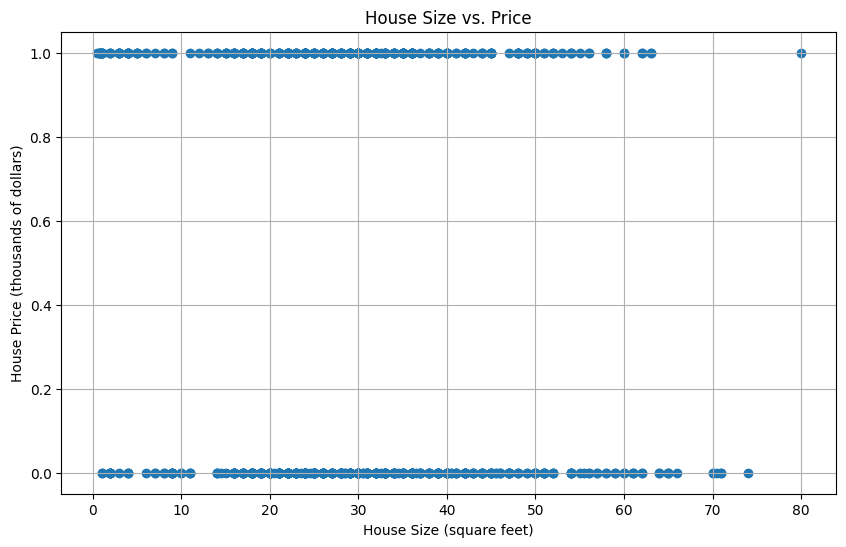

In [5]:
# Create a scatter plot of house size vs. price

xxx = data['Size'] if task=='ragression' else data['Age']
yyy = data['Price'] if task=='ragression' else data['Survived']

plt.figure(figsize=(10, 6))
plt.scatter(xxx, yyy)
plt.title('House Size vs. Price')
plt.xlabel('House Size (square feet)')
plt.ylabel('House Price (thousands of dollars)')
plt.grid(True)
plt.show()

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox)

## Step 4: Split the data into training and testing sets

Before training our model, we need to split our data into:
- **Training set**: Used to train the model
- **Testing set**: Used to evaluate how well the model performs on new, unseen data

Why?

We need to ensure our model **generalizes** enough, meaning it does not learn the specific structure of the training set, but rather learns the underlying structure of $f$

In [6]:
# Define features (X) and target (y)

data.dropna(inplace=True)

X = data[['Size']] if task=='ragression' else data[['Age']]
y = data['Price'] if task=='ragression' else data['Survived']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")

Training data size: 571 samples
Testing data size: 143 samples


## Step 5: Create and train the model

Now we'll create a linear regression model and train it using our training data.

In [7]:
# Create a linear regression model
model = LinearRegression() if task=='regression' else LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

if task == 'regression':
    # Check the coefficient (slope) and intercept of our linear model
    print(f"Model coefficient (slope): {model.coef_[0]:.4f}")
    print(f"Model intercept: {model.intercept_:.4f}")
    print(f"y = {model.intercept_:.4f} + {model.coef_[0]:.4f} * x")

## Step 6: Make predictions and evaluate the model

Let's use our trained model to make predictions on the test data and evaluate how well it performs.

In [8]:
# Make predictions on the test data
if task == 'regression':
    y_pred = model.predict(X_test)
else:
    cutoff = 0.6
    y_pred = [1 if x[0] < cutoff else 0 for x in model.predict_proba(X_test)]

# Calculate the mean squared error (MSE) - a common metric to evaluate regression models
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Calculate R-squared score (coefficient of determination)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 0.60
Root Mean Squared Error: 0.78
R-squared Score: -1.5242


## Step 7: Visualize the results

Finally, let's visualize our model's predictions against the actual data to see how well our linear regression line fits.

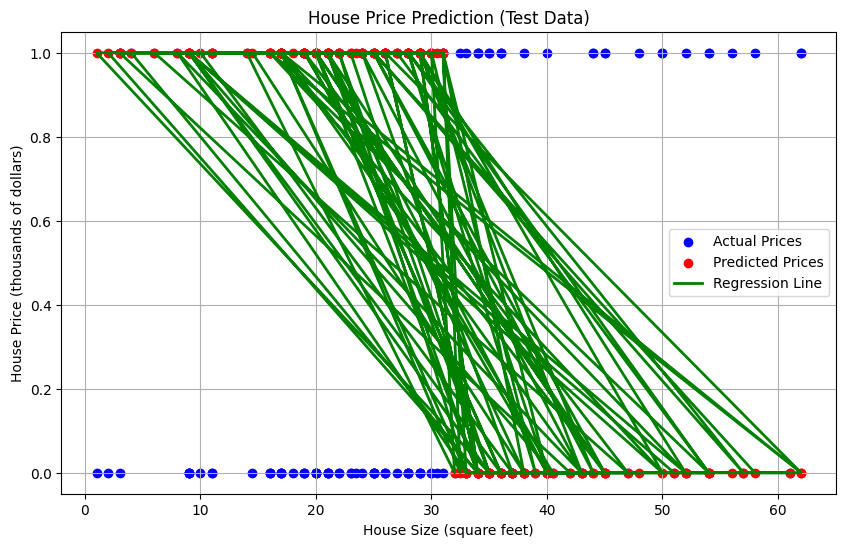

In [9]:
# Plot the original data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')

# Plot the predicted data points
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices')

# Plot the regression line
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

plt.title('House Price Prediction (Test Data)')
plt.xlabel('House Size (square feet)')
plt.ylabel('House Price (thousands of dollars)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
if task == 'classification':
    print(confusion_matrix(y_test,y_pred))

[[27 60]
 [26 30]]


## Step 8: Use the model to make new predictions

Now that we have a trained model, we can use it to predict the price of houses with sizes that weren't in our original dataset.

In [11]:
# LOAD MODEL
# collect real world set of input
# make predictions

# Create some new house sizes that we want to predict prices for
new_house_sizes = np.array([[1500], [2000], [2500]])

# Use our model to predict the prices
predicted_prices = model.predict(new_house_sizes)

# Display the results
for size, price in zip(new_house_sizes.flatten(), predicted_prices):
    print(f"A house with {size} square feet is predicted to cost ${price:.2f} thousand")

A house with 1500 square feet is predicted to cost $0.00 thousand
A house with 2000 square feet is predicted to cost $0.00 thousand
A house with 2500 square feet is predicted to cost $0.00 thousand


C:\Users\marti\PycharmProjects\MachineLearning_bootcamp\.env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### What are Overfitting and Underfitting?

When training machine learning models, we face two common challenges:

1. **Underfitting**: The model is too simple and fails to capture the underlying pattern in the data.
2. **Overfitting**: The model is too complex and fits the training data too closely, capturing noise instead of the true underlying relationship.

Let's visualize these concepts using our house price dataset!

In [12]:
# Prepare the data
X = data[['Size']]
y = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create models of varying complexity
models = [
    ('Underfit (Linear)', LinearRegression()),
    ('Just Right (Quadratic)', make_pipeline(PolynomialFeatures(2), LinearRegression())),
    ('Overfit (High Degree Polynomial)', make_pipeline(PolynomialFeatures(10), LinearRegression()))
]

# Visualize different model complexities
plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models, 1):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Plot
    plt.subplot(1, 3, i)
    
    # Sort X for smooth curve plotting
    sort_axis = np.argsort(X_test.values.flatten())
    X_test_sorted = X_test.values[sort_axis]
    y_test_sorted = y_test.values[sort_axis]
    y_pred_sorted = y_test_pred[sort_axis]
    
    # Scatter plot of actual data
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data')
    
    # Plot the model's predictions
    plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Model Prediction')
    
    plt.title(f'{name}\nTrain MSE: {train_mse:.2f}\nTest MSE: {test_mse:.2f}')
    plt.xlabel('House Size')
    plt.ylabel('House Price')
    plt.legend()

plt.tight_layout()

plt.show()

KeyError: "None of [Index(['Size'], dtype='object')] are in the [columns]"

https://datascience-george.medium.com/how-to-use-testing-and-validation-sets-f2e7f7aa10ad

## Bonus during the lesson in case of available time

Implement classification on titanic dataset with sklearn NaiveBayesClassifier or LogisticRegression

## Conclusion

Congratulations! You've just built and trained your first machine learning model using linear regression. Here's what we learned:

1. How to prepare and visualize data
2. How to split data into training and testing sets
3. How to create and train a linear regression model
4. How to evaluate the model's performance
5. How to use the model to make new predictions
6. How to qualitatively assess if we are overfitting or underfitting

This is just the beginning of your machine learning journey. As you progress, you can explore more complex algorithms and datasets!

## Homework Exercise

Start from this notebook.

Assume house price depends not only on size, but also on number of windows.

n_windows = np.random.randint(3,8,n_samples)

house_prices = 100 + 0.2 * house_sizes - 0.00003 * house_sizes**2 + np.random.normal(0, 50, n_samples) + 15*n_windows

Try:
1) change the initial data, but keep using only house_sizes as regressor. What has changed?
2) adapt the notebook to using both house_sizes and n_windows as regressors. What has changed?
3) come up with a good way to visualize linear regression outputs with 2 regressors


